In [1]:
# General-level imports:
import os
import pandas as pd

# For data-reading capabilities:
from seppy.tools import Event

# Importing the Regression-Onset tool:
import regression_onset as reg
from regression_onset import select_data

## Selecting the data file; choose either SEPpy or Local

> SEPpy employs automatic data-loading capabilities online

> User defined opens up data from your local directory

In [2]:
display(select_data.data_file)

ToggleButtons(description='Data source: ', index=1, options=('SEPpy', 'User defined'), tooltips=('Select SEPpy…

### Use either SEPpy to acquire the desired data, or directly choose your own file below:

In [10]:
# This is the path to your data directory
path = f"{os.getcwd()}{os.sep}data"

# The name of your data file, if you're loading in your own data. 
filename = "solo_ept_sun_e.csv"

# To download (or load if files are locally present) SEPpy data, one needs to provide a time span.
# If you're not using SEPpy, this can be ignored.
start_date = "2022-01-20"
end_date = "2022-01-21"

if select_data._seppy_selected(select_data.data_file):
    import seppy.tools.widgets as w
    display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

## The next cell takes care of data loading. Just run it.

In [11]:
if select_data._seppy_selected(select_data.data_file):
    # Initializes the SEPpy Event object
    seppy_data = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, species=w.species_drop.value,
                         start_date=start_date, end_date=end_date, data_level="l2",
                         data_path=path, viewing=w.view_drop.value)
    
    # Exports the data to a pandas dataframe
    df = reg.externals.export_seppy_data(event=seppy_data)

else:
    # Uses pandas to_csv() to load in a local data file:
    df = pd.read_csv(f"{path}{os.sep}{filename}", parse_dates=True, index_col=0)

In [12]:
# Check the dataframe
display(df)

,E4,E5
datetime,,
2022-01-20 00:00:30.451561,831.95230,403.3569
2022-01-20 00:01:30.451561,415.97614,403.3569
2022-01-20 00:02:30.451561,0.00000,806.7138
2022-01-20 00:03:30.451561,1663.90450,1210.0707
2022-01-20 00:04:30.451561,831.95230,1210.0707
...,...,...
2022-01-21 23:55:30.451561,1247.92830,1210.0707
2022-01-21 23:56:30.451561,415.97614,2016.7845
2022-01-21 23:57:30.451561,1247.92830,2823.4985


## Use the quicklook-plot in the cell below to apply a selection to the data:
#### Notice that the plot produced by `quicklook()` is an **interactive** plot.

1) Use the `selection` parameter to set the selection such that it encompasses at least the background and peak of the event.

2) `selection` can be either a timestamp or a pair of timestamps given as strings, e.g., ["2025-03-19 12:00", "2025-03-20 18:00"].

3) A pair of timestamps define a selection between the timestamps; a single timestamp defines selection up to that time from the start of the data file.

4) Not providing `selection` enables the user to apply the selection by clicking on the plot instead. A single click applies selection UP TO the chosen time. Clicking again overwrites the previous click. This procedure requires interactive capabilities.

5) Vertical green line(s) on the plot indicate the selection.

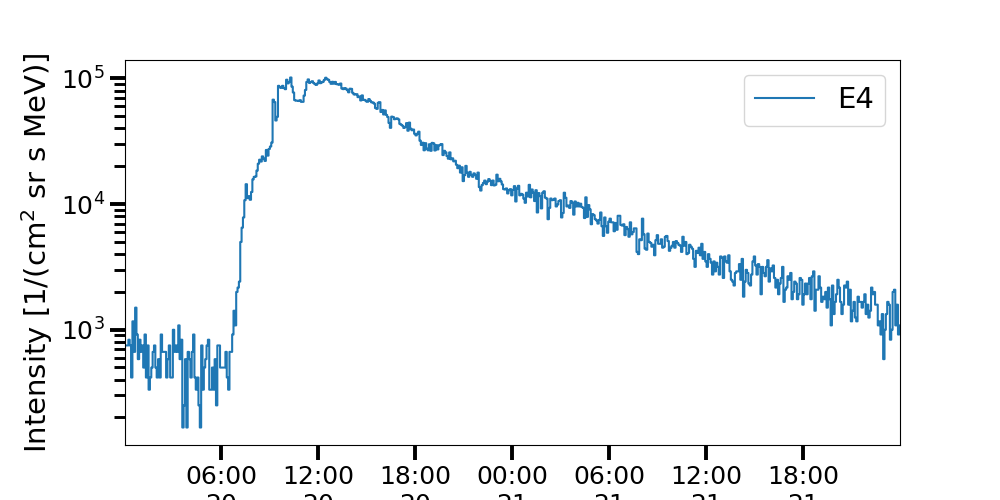

In [14]:
# Initializing the tool with input data
event = reg.Reg(data=df)

# Choose the channel(s) to examine in quicklook plot
channel = "E4"

# Leaving selection to None 
selection = None # selection=["2022-01-20 02:00", "2022-01-20 12:00"]

# Display a quicklook plot of the input data (df).
# Apply the selection of data for the tool by 'selection' parameter or by clicking
# on the plot.
# The line magic 'ipympl' enables interactive mode
%matplotlib ipympl
event.quicklook(channel=channel, resample="5 min")

## Use the find_breakpoints() -method to find a given number of breakpoints in the selected segment of data:

> fill_zeroes (bool) is a switch that applies filling out 0 count bins with a filler value f that satisfies the equation:
$$
\mu_{lg} = \frac{1}{N} \bigg( \sum_{i}^{N_{nz}} \lg(j_{i,nz}) + (N-N_{nz}) \lg(f) \bigg),
$$
> where $\mu_{lg}$ is the logarithm of the mean of the background, $N$ is the total number of data points in the background, $N_{nz}$ is the number of non-zero data in the background, $j_{i, nz}$ is a non-zero intensity measurement in the background and $\lg(\cdot)$ is the 10-base logarithm.
> 
> Setting fill_zeroes = False means 0 counts get ignored altogether.

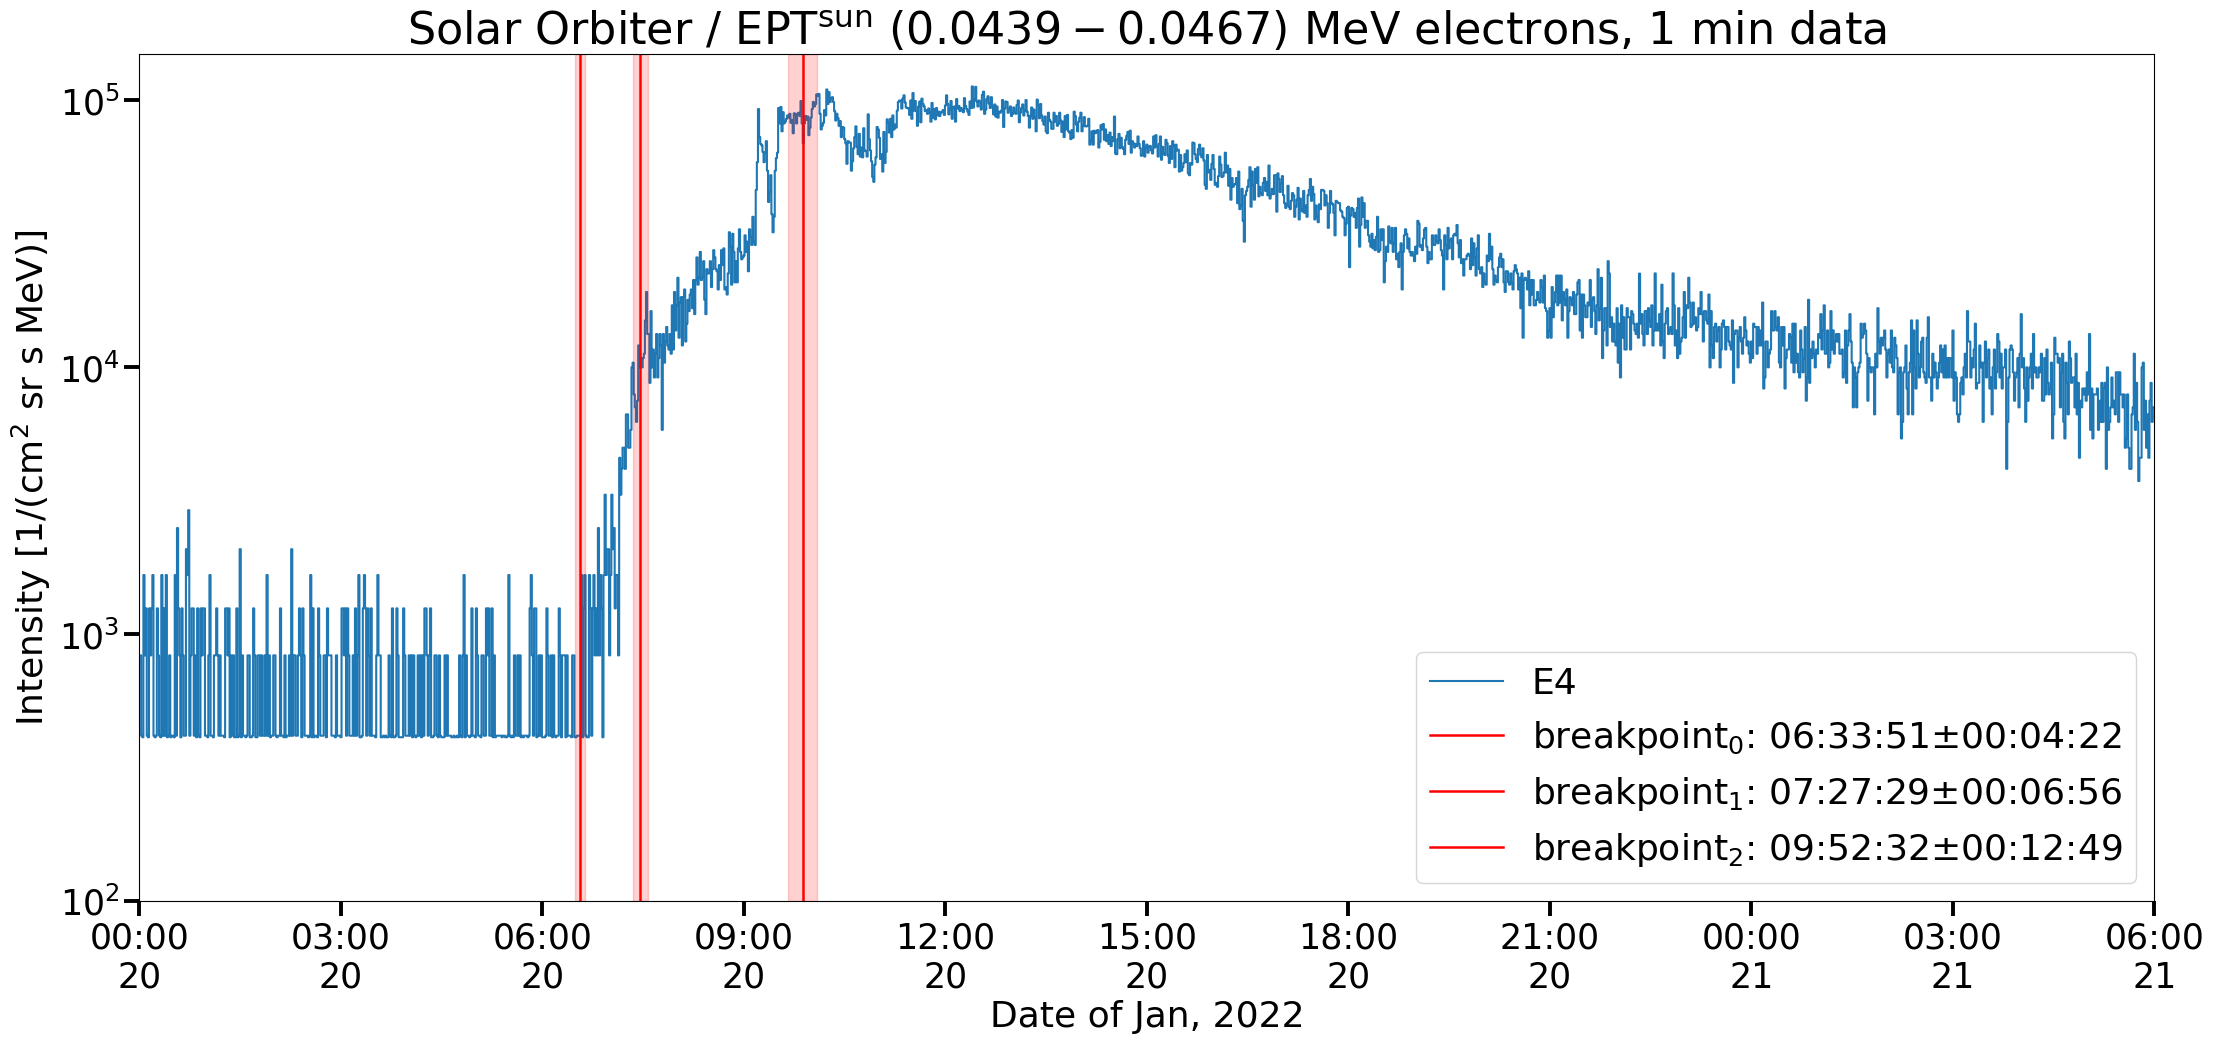

In [15]:
# Title for the figure (optional)
title = r"Solar Orbiter / EPT$^{\mathrm{sun}}$ ($0.0439 - 0.0467$) MeV electrons, 1 min data"

# The channel to consider
#channel = "E5"

# Time-averages the data to given cadence
resample = "1 min"

# The number of breakpoints to seek from the data selection
num_of_breaks = 3

# Boundaries of the time axis
xlim = ["2022-01-20 00:00", "2022-01-21 06:00"]

# Fills zero counts with a filler falue f
fill_zeroes = True

%matplotlib inline
results = event.find_breakpoints(channel=channel, breaks=num_of_breaks, fill_zeroes=fill_zeroes,
                                  xlim=xlim, title=title, resample=resample)

## Display the results:
#### the results are a dictionary that contains the parameters of the fits (constant and slopes), the breakpoints and their 95% confidence intervals, the figure and its axes.

In [16]:
display(results)

{'const': np.float64(9138.187728630071),
 'alpha0': np.float64(-5.561388491347813e-06),
 'alpha1': np.float64(0.00038264015069343934),
 'alpha2': np.float64(0.00011213829565417423),
 'alpha3': np.float64(-8.697477336639075e-06),
 'breakpoint0': Timestamp('2022-01-20 06:33:51.636940718'),
 'breakpoint1': Timestamp('2022-01-20 07:27:29.566060305'),
 'breakpoint2': Timestamp('2022-01-20 09:52:32.830252647'),
 'breakpoint0_errors': (Timestamp('2022-01-20 06:29:29.583232641'),
  Timestamp('2022-01-20 06:38:13.690648794')),
 'breakpoint1_errors': (Timestamp('2022-01-20 07:20:32.926035643'),
  Timestamp('2022-01-20 07:34:26.206084967')),
 'breakpoint2_errors': (Timestamp('2022-01-20 09:39:43.174447298'),
  Timestamp('2022-01-20 10:05:22.486057997')),
 'fig': <Figure size 2600x1100 with 1 Axes>,
 'ax': <Axes: title={'center': 'Solar Orbiter / EPT$^{\\mathrm{sun}}$ ($0.0439 - 0.0467$) MeV electrons, 1 min data'}, xlabel='Date of Jan, 2022', ylabel='Intensity [1/(cm$^{2}$ sr s MeV)]'>}

## Saving the figure:

In [17]:
figure_name = "name_for_your_figure.png"

reg.externals.save_figure(results=results, name=figure_name)